<a href="https://colab.research.google.com/github/noorulghousiah/DeepLearning/blob/main/12_Image_Classification_using_pre_trained_models_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification Using Pre-trained models

Pre-trained models are Neural Network models trained on large benchmark datasets like ImageNet. The Deep Learning community has greatly benefitted from these open-source models. Also, the pre-trained models are a major factor for rapid advances in Computer Vision research. Other researchers and practitioners can use these state-of-the-art models instead of re-inventing everything from scratch.

Given below is a rough timeline of how the state-of-the-art models have improved over time. We have included only those models which are present in the Torchvision package.


![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/fig35.PNG)

Before we jump into the details of how we can use pre-trained models for image classification, let’s see what are the various pre-trained models available. We will discuss AlexNet and ResNet101 as the two main examples here. Both the networks have been trained on ImageNet dataset.

ImageNet dataset has over 14 million images maintained by Stanford University. It is extensively used for a large variety of Image related deep learning projects. The images belong to various classes or labels. Even though we can use both the terms interchangeably, we will stick to classes. The aim of the pre-trained models like AlexNet and ResNet101 is to take an image as an input and predict it’s class.

The word pre-trained here means that the deep learning architectures AlexNet and ResNet101, for instance, have been already trained on some (huge) dataset and thus carry the resultant weights and biases with them. This difference between architecture and weights and biases should be very clear because as we will see in the next section, TorchVision has both the architectures and the pre-trained models.

### Model Inference Process

Since we are going to focus on how to use the pre-trained models for predicting the class (label) of input, let’s also discuss the process involved in this. This process is referred to as Model Inference. The entire process consists of the following main steps.

Reading the input image
Performing transformations on the image. For example – resize, center crop, normalization, etc.
Forward Pass: Use the pre-trained weights to find out the output vector. Each element in this output vector describes the confidence with which the model predicts the input image to belong to a particular class.
Based on the scores obtained (elements of the output vector we mentioned in step-3), display the predictions.

### Loading Pre-Trained Network using TorchVision

In [1]:
import torch, torchvision
from torchvision import datasets, models, transforms

In [2]:
# Print the models available in torchvision
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Carefully observe the output that we got above.

Notice that there is one entry called **AlexNet** and one called **alexnet**. The capitalised name refers to the Python class (AlexNet) whereas alexnet is a convenience function that returns the model instantiated from the AlexNet class. It’s also possible for these convenience functions to have different parameter sets. For example, densenet121, densenet161, densenet169, densenet201, all are instances of DenseNet class but with a different number of layers – 121,161,169 and 201, respectively.

## Using AlexNet for Image Classification

Let’s first start with AlexNet. It is one of the early breakthrough networks in Image Recognition.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/fig36.PNG)

### Step 1: Load the pre-trained model

In [3]:
alexnet = models.alexnet(pretrained=True)
print(alexnet)

# You will see a similar output as below
# Downloading: "https://download.pytorch.org/models/alexnet-owt- 4df8aa71.pth" to /home/hp/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 136MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Step 2: Specify image transformations

Once we have the model with us, the next step is to transform the input image so that they have the right shape and other characteristics like mean and standard deviation. These values should be similar to the ones which were used while training the model. This makes sure that the network will produce meaningful answers.

We can pre-process the input image with the help of transforms present in TochVision module. In this case, we can use the following transforms for both AlexNet and ResNet.

In [4]:
# Specify image transformations
from torchvision import transforms

transform = transforms.Compose([transforms.ToPILImage(),         #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])


Let’s try to understand what happened in the above code snippet.

Line [1]: Here we are defining a variable transform which is a combination of all the image transformations to be carried out on the input image.

Line [2]: Resize the image to 256×256 pixels.

Line [3]: Crop the image to 224×224 pixels about the center.

Line [4]: Convert the image to PyTorch Tensor data type.

Line [5-7]: Normalize the image by setting its mean and standard deviation to the specified values.

### Step 3: Load the input image and pre-process it

Next, let’s load the input image and carry out the image transformations we have specified above. Note that we will use Pillow (PIL) module extensively with TorchVision as it’s the default image backend supported by TorchVision.

In [5]:
from requests import get  # to make GET request

def download(url, file_name):
    # open in binary mode
    with open(file_name, "wb") as file:
        # get request
        response = get(url)
        # write to file
        file.write(response.content)

In [6]:
# Download image
!wget https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg -O dog.jpg

# url = "https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg"
file_name = "dog.jpg"
# download(url, file_name)

--2025-05-15 18:23:09--  https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83281 (81K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  81.33K  --.-KB/s    in 0.003s  

2025-05-15 18:23:09 (25.0 MB/s) - ‘dog.jpg’ saved [83281/83281]



In [7]:
# Download classes text file
!wget https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt

# url = 'https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt'
file_name = 'imagenet_classes.txt'
# download(url, file_name)

--2025-05-15 18:23:26--  https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21674 (21K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  21.17K  --.-KB/s    in 0s      

2025-05-15 18:23:27 (131 MB/s) - ‘imagenet_classes.txt’ saved [21674/21674]



In [8]:
# from PIL import Image
# img = Image.open("dog.jpg")

import cv2
img = cv2.imread("dog.jpg")

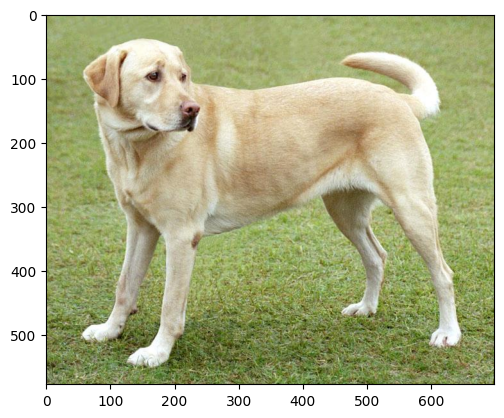

In [9]:
import matplotlib.pyplot as plt

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

It is a Yellow Labrador (Source: Wikipedia)

Next, pre-process the image and prepare a batch to be passed through the network.

In [10]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

It adds a new dimension at position 0 (the batch dimension).

Resulting shape becomes:
batch_t.shape = [1, 3, 224, 224]
This wraps the single image into a batch of size 1 so it can be passed to the model.

adds a batch dimension to a single image tensor img_t, making it suitable for input into a CNN or other PyTorch model.

### Step 4: Model Inference
Finally, it’s time to use the pre-trained model to see what the model thinks the image is.

First, we need to put our model in **eval** mode.

In [11]:
# Put our model in eval mode
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
# Carry out inference
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


This is all good but what do we do with this output vector out with 1000 elements? We still haven’t got the class (or label) of the image. For this, we will first read and store the labels from a text file having a list of all the 1000 labels. Note that the line number specified the class number, so it’s very important to make sure that you don’t change that order.

In [13]:
# Load labels
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

Since AlexNet and ResNet have been trained on the same ImageNet dataset, we can use the same classes list for both models.

Now, we need to find out the index where the maximum score in output vector out occurs. We will use this index to find out the prediction.

Saluki, gazelle hound 0.23188823461532593
bull mastiff 0.0775064080953598
Great Dane 0.0630815401673317
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier 0.05443795025348663
whippet 0.050885722041130066


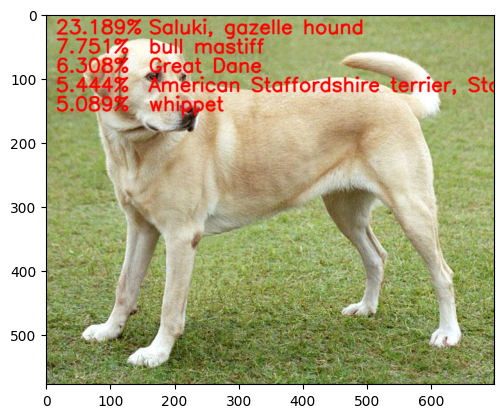

In [14]:
from google.colab.patches import cv2_imshow

image = img.copy()

# Get the softmax probabilities.
probabilities = torch.nn.functional.softmax(out, dim=1)[0]
# Check the top 5 categories that are predicted.
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    cv2.putText(image, f"{top5_prob[i].item()*100:.3f}%", (15, (i+1)*30),
                cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f"{classes[top5_catid[i]]}", (160, (i+1)*30),
                cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 0, 255), 2, cv2.LINE_AA)
    print(classes[top5_catid[i]], top5_prob[i].item())

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
# First, load the model
resnet = models.resnet101(pretrained=True)

# Second, put the network in eval mode
resnet.eval()

# Third, carry out model inference
out = resnet(batch_t)

# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]


[('Weimaraner', 12.432007789611816),
 ('Labrador retriever', 7.693698883056641),
 ('Chesapeake Bay retriever', 7.524167060852051),
 ('Siberian husky', 6.826291084289551),
 ('Eskimo dog, husky', 6.10917854309082)]

Weimaraner 0.12432008236646652
Labrador retriever 0.0769369900226593
Chesapeake Bay retriever 0.07524167001247406
Siberian husky 0.06826291233301163
Eskimo dog, husky 0.06109178438782692


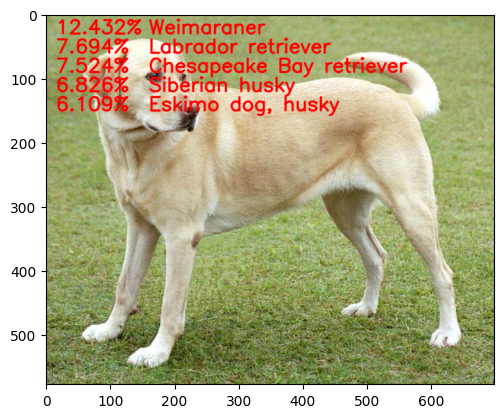

In [16]:
from google.colab.patches import cv2_imshow

image = img.copy()

# Get the softmax probabilities.
probabilities = torch.nn.functional.softmax(out, dim=1)[0]
# Check the top 5 categories that are predicted.
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    cv2.putText(image, f"{top5_prob[i].item()*100:.3f}%", (15, (i+1)*30),
                cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f"{classes[top5_catid[i]]}", (160, (i+1)*30),
                cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 0, 255), 2, cv2.LINE_AA)
    print(classes[top5_catid[i]], top5_prob[i].item())

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

If you are not aware, all these are dog breeds. So the model managed to predict that it was a dog with a fairly high confidence but it was not very sure about the breed of the dog.

### Test on webcam

In this section, we will perform inference using a pre-trained ResNet50 model, taking input directly from the webcam.

Before passing the captured frame to the model, we must apply the necessary input transformations expected by ResNet50 (e.g., resizing, normalization, and tensor conversion).

⚠️ Note: Please ensure that the file [imagenet_classes.txt](https://gist.github.com/ageitgey/4e1342c10a71981d0b491e1b8227328b) is downloaded and placed in the same directory as your Python script. This file contains the class labels corresponding to the model's output.

In [18]:
import torchvision.models as models
import torch
import time
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms

def preprocess():
    """
    Define the transform for the input image/frames.
    Resize, crop, convert to tensor, and apply ImageNet normalization stats.
    """
    transform =  transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),])
    return transform
def read_classes():
    """
    Load the ImageNet class names.
    """
    with open("imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    return categories

# Set the computation device.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Initialize the model.
model = models.resnet50(pretrained=True)
model.eval()
# Load the ImageNet class names.
categories = read_classes()
# Initialize the image transforms.
transform = preprocess()

model.to(device)

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

#     rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Apply transforms to the input image.
    input_tensor = transform(frame)
    # Add the batch dimension.
    input_batch = input_tensor.unsqueeze(0)
    input_batch = input_batch.to(device)

    with torch.no_grad():
        start_time = time.time()
        output = model(input_batch)
        end_time = time.time()
    # Get the softmax probabilities.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    # Check the top 5 categories that are predicted.
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    for i in range(top5_prob.size(0)):
        cv2.putText(frame, f"{top5_prob[i].item()*100:.3f}%", (15, (i+1)*30),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame, f"{categories[top5_catid[i]]}", (160, (i+1)*30),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 2, cv2.LINE_AA)
        print(categories[top5_catid[i]], top5_prob[i].item())


    cv2.imshow('Raw Webcam Feed', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        break

cv2.destroyAllWindows()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 209MB/s]
